In [1]:
import numpy as np
import pandas as pd
import glob

In [2]:
img_path_lst = glob.glob("../data/raw/image/image/*")

In [3]:
img_path_lst[:5]

['../data/raw/image/image\\input_100_10_1.jpg',
 '../data/raw/image/image\\input_100_10_10.jpg',
 '../data/raw/image/image\\input_100_10_11.jpg',
 '../data/raw/image/image\\input_100_10_12.jpg',
 '../data/raw/image/image\\input_100_10_13.jpg']

In [4]:
img_path_lst[0].split("\\")

['../data/raw/image/image', 'input_100_10_1.jpg']

In [7]:
df = pd.read_csv("../data/raw/chinese_mnist.csv")

In [12]:
df

,suite_id,sample_id,code,value,character
0,1,1,10,9,九
1,1,10,10,9,九
2,1,2,10,9,九
3,1,3,10,9,九
4,1,4,10,9,九
...,...,...,...,...,...
14995,99,5,9,8,八
14996,99,6,9,8,八
14997,99,7,9,8,八
14998,99,8,9,8,八


In [17]:
myPath = img_path_lst[0]
myPath

'../data/raw/image/image\\input_100_10_1.jpg'

In [18]:
# importing Image class from PIL package 
from PIL import Image 
  
# creating a object 
im = Image.open(myPath) 
  
im.show()

In [23]:
pix = np.array(im.getdata()).reshape(im.size[0], im.size[1])

In [26]:
import matplotlib.pyplot as plt

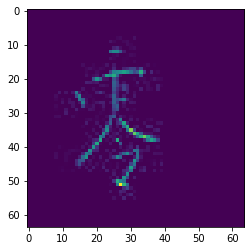

In [27]:
plt.imshow(pix)

In [30]:
pix.flatten()

array([0, 0, 0, ..., 0, 0, 0])

In [39]:
np.array(im.getdata())

array([0, 0, 0, ..., 0, 0, 0])

In [134]:
from tqdm import tqdm

In [135]:
id_lst = []
arr_lst = []
for i in tqdm(img_path_lst):
    id_lst.append(i.split("_")[-1].split(".")[0])
    im = Image.open(i)
    pix = np.array(im.getdata())
    arr_lst.append(pix)

100%|██████████████████████████████████████████████████████████████████████████| 15000/15000 [00:09<00:00, 1624.44it/s]


In [136]:
res = pd.DataFrame([id_lst, arr_lst]).T

In [137]:
D = {
    1: "零",
    2: "一",
    3: "二",
    4: "三",
    5: "四",
    6: "五",
    7: "六",
    8: "七",
    9: "八",
    10: "九",
    11: "十",
    12: "百",
    13: "千",
    14: "万",
    15: "亿"
}

In [138]:
D2 = {
    "零": 0,
    "一": 1,
    "二": 2,
    "三": 3,
    "四": 4,
    "五": 5,
    "六": 6,
    "七": 7,
    "八": 8,
    "九": 9,
    "十": 10,
    "百": 100,
    "千": 1000,
    "万": 10000,
    "亿": 100000000,
}

In [139]:
res[0] = res[0].astype(int)

In [140]:
res[2] = res[0].apply(lambda x: D[x])

In [141]:
res[3] = res[2].apply(lambda x: D2[x])

In [142]:
res.columns = "label", "arr", "cn_label", "value"

In [144]:
res[['arr', 'label', 'cn_label', ]]

,arr,label,cn_label
0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1,零
1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",10,九
2,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",11,十
3,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",12,百
4,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",13,千
...,...,...,...
14995,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",5,四
14996,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",6,五
14997,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",7,六
14998,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",8,七


In [145]:
res.arr[0].shape

(4096,)

In [146]:
arr_df = pd.DataFrame(res.arr.tolist())

In [147]:
arr_df = arr_df.astype(np.int8)

In [148]:
res = res.drop('arr', axis = 1)

In [149]:
res = res.merge(arr_df, left_index = True, right_index = True)

In [151]:
res

,label,cn_label,value,0,1,2,3,4,5,6,...,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095
0,1,零,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,10,九,9,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,11,十,10,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,12,百,100,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,13,千,1000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,5,四,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14996,6,五,5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14997,7,六,6,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14998,8,七,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [155]:
res.iloc[:10000].to_csv('../data/processed_chinese_mnist_part_1.csv', index = False)

In [156]:
res.iloc[10000:].to_csv('../data/processed_chinese_mnist_part_2.csv', index = False)

In [157]:
res

,label,cn_label,value,0,1,2,3,4,5,6,...,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095
0,1,零,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,10,九,9,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,11,十,10,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,12,百,100,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,13,千,1000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,5,四,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14996,6,五,5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14997,7,六,6,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14998,8,七,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
